In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7970,CV Templates 2018,FAMILY,4.0,13,26M,"5,000+",Free,0,Everyone,Education,"October 9, 2017",1.1,4.0.3 and up
6856,Bacteria Vaginosis,HEALTH_AND_FITNESS,4.0,4015,7.7M,"1,000,000+",Free,0,Mature 17+,Health & Fitness,"April 27, 2017",6.0,3.0 and up
7484,INFAMY RO,FAMILY,4.1,2167,3.7M,"50,000+",Free,0,Everyone,Role Playing,"December 14, 2017",202,4.3 and up
8976,SportLook,PHOTOGRAPHY,2.5,1283,8.2M,"100,000+",Free,0,Everyone,Photography,"June 21, 2018",1.2.7,4.1 and up
7680,CP RACING 2 FREE,FAMILY,4.0,4607,19M,"100,000+",Free,0,Everyone,Simulation,"March 12, 2018",3,4.0 and up


In [4]:
df=df.drop(df.index[10472])

In [5]:
df["Reviews"] = df["Reviews"].astype(int)

In [6]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [7]:
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [8]:
remover_items=['+',',','$']
columnas=['Installs','Price']
for item in remover_items:
    for col in columnas:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [10]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [11]:
df.drop('Last Updated', axis=1, inplace=True)

In [12]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


<BarContainer object of 14 artists>

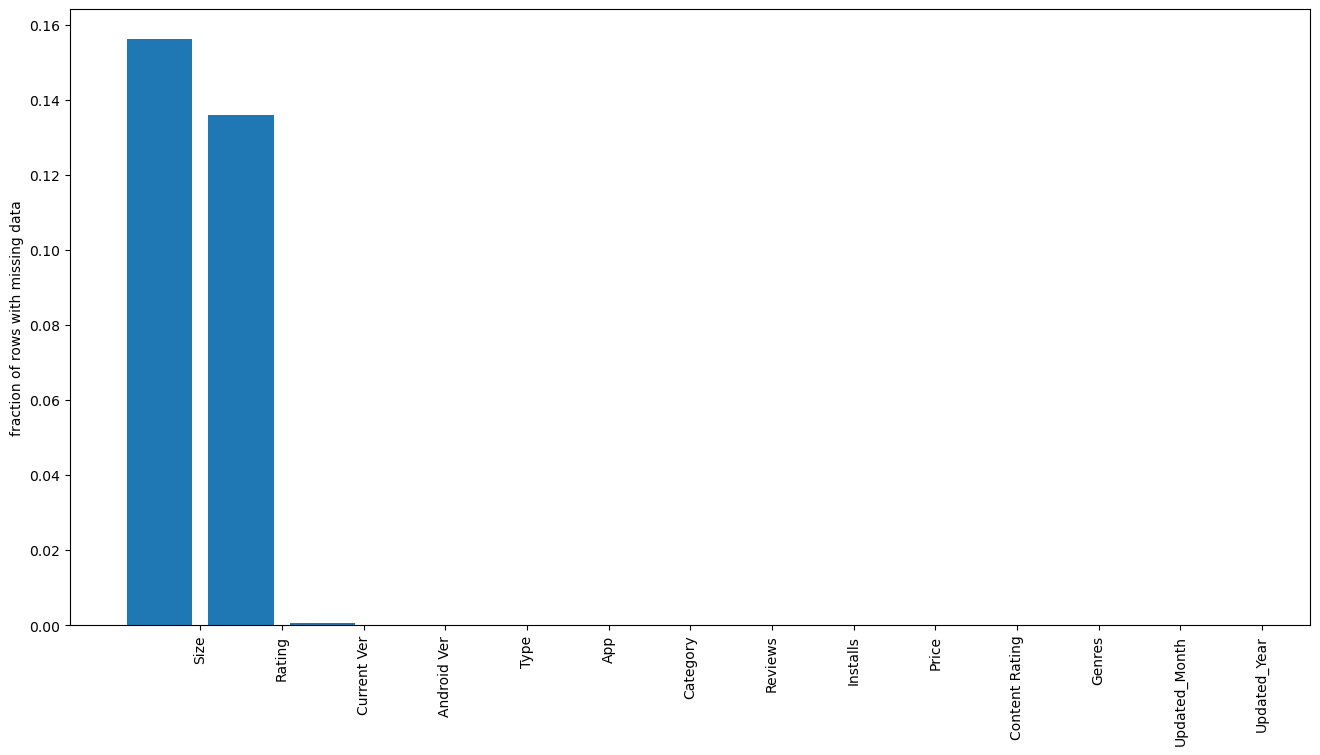

In [13]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [14]:
def impute_median(series):
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(impute_median)

In [15]:
def impute_median(series):
    return series.fillna(series.median())

df['Size'] = df['Size'].transform(impute_median)

In [16]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [17]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [20]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

In [21]:
target = 'Rating'

In [22]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from collections import defaultdict
le_dict = defaultdict()

In [25]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Ajuste y transformación de los datos de entrenamiento
    X_train[col] = X_train[col].astype('category') # Conversión de las características codificadas en etiquetas de tipo numérico a categórico en pandas
    X_test[col] = le.transform(X_test[col]) # Transformar sólo los datos de prueba
    X_test[col] = X_test[col].astype('category') # Convertir las características codificadas en etiquetas de numéricas a categóricas dtype in pandas
    le_dict[col] = le # Guardar el codificador de etiquetas para características individuales

In [26]:
# Conversión y adición de «Last Updated Month» a características categóricas
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listado de características numéricas a escala
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [27]:
# Check the data type of y_train
print(y_train.dtype)
print(y_train[:10])  # Print the first 10 values to inspect

# If y_train is continuous, binarize or categorize it
if y_train.dtype in ['float64', 'float32', 'int64', 'int32']:
    # Example: convert continuous target to binary (0 or 1)
    # This is just an example; you need to define how you want to categorize your target
    y_train = (y_train > y_train.mean()).astype(int)
    y_test = (y_test > y_test.mean()).astype(int)


float64
1948    4.3
1201    4.3
4700    4.2
9156    4.4
3632    4.5
876     4.5
1301    4.0
4565    4.3
9462    4.3
5009    3.9
Name: Rating, dtype: float64


In [28]:
# Implementación de K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Resultados de CV: {cv_results}")
print(f"Promedio de CV: {cv_results.mean():.2f}")

Resultados de CV: [0.70307785 0.69885335 0.73264937 0.72299336 0.69565217]
Promedio de CV: 0.71


#### Resultados de la Validación Cruzada
* Resultados de CV: [0.70307785 0.69885335 0.73264937 0.72299336 0.69565217]* 
Promedio de CV: 0.71

#### Desglose de los Resultados
   Los resultados específicos para cada pliegue son:
   - **Primera iteración**: 0.70307785
   - **Segunda iteración**: 0.69885335
   - **Tercera iteración**: 0.73264937
   - **Cuarta iteración**: 0.72299336
   - **Quinta iteración**: 0.69565217

#### Análisis de los Resultados
1. **Consistencia del modelo**:
* La variación entre los pliegues es relativamente pequeña, con un rango de aproximadamente 0.037 (desde 0.69565217 hasta 0.73264937). Esto sugiere que el modelo tiene un desempeño bastante consistente, sin grandes variaciones entre los diferentes conjuntos de datos de entrenamiento y prueba.
* La variacion de 0.037 indica que el modelo es fiable y no está excesivamente influenciado por las particiones de los datos.

2. **Interpretación del Promedio de CV**:
* El promedio de los resultados de la validación cruzada es 0.71.
* Indica que el modelo predice correctamente el 71% de los casos en promedio.
* Este promedio no es ni bueno ni malo, indica un buen rendimiento, pero aun con un gran margen de mejoras

3. **Desempeño de los Pliegues Extremos**:
* Los pliegues extremos en este conjunto son:
    - El más bajo: 0.69565217
    - El más alto: 0.73264937
* Como no se ve una disparidad muy alta, esto es positivo
    - Sin embargo, se podría investigar si ciertas características de los datos en los pliegues más bajos contribuyen a un peor rendimiento, lo cual podría ofrecer oportunidades para mejorar el modelo.


#### Conclsion
* El modelo muestra una buena consistencia a través de los pliegues de validación cruzada, con un promedio de precisión del 71%, lo cual es bastante decente.
* La pequeña variación en el desempeño de los pliegues sugiere que el modelo es robusto y confiable.

### Matriz de Confusión

Una matriz de confusión proporciona una representación tabular del rendimiento de un algoritmo de clasificación, mostrando el número de instancias clasificadas correctamente e incorrectamente para cada clase. Vamos a interpretar la matriz de confusión proporcionada:


Clases en y_test: [0, 1]
Clases en y_pred: [0, 1]


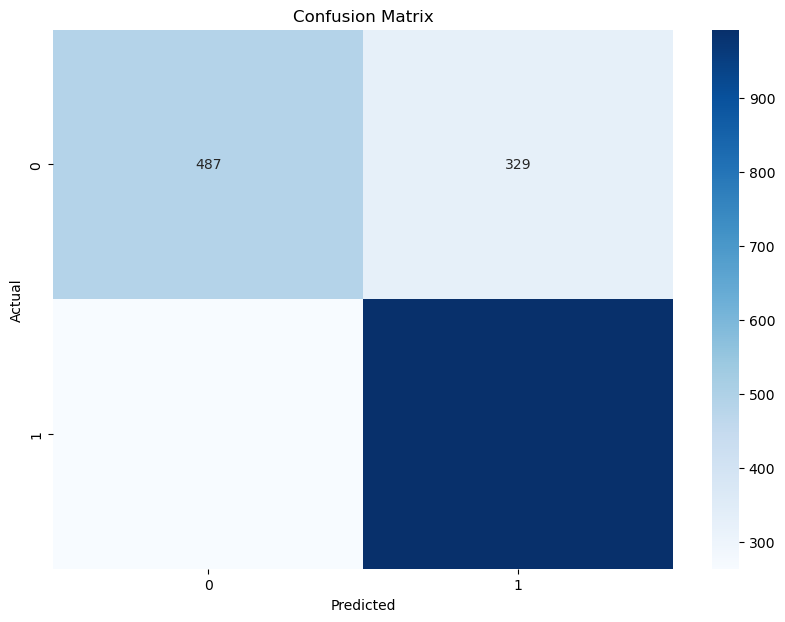

In [29]:
# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener los nombres de las clases
class_names = [0, 1]  # Para este caso específico, ya que tenemos clases 0 y 1

# Verificación de las clases en y_test y y_pred
print(f"Clases en y_test: {sorted(set(y_test))}")
print(f"Clases en y_pred: {sorted(set(y_pred))}")

# Visualizar la matriz de confusión usando Matplotlib y Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
cm

array([[487, 329],
       [264, 992]], dtype=int64)

#### Estructura de la Matriz de Confusión
La matriz tiene la siguiente estructura:

```
              Predicted Class
              |   0   |   1   |
Actual Class  |-------|-------|
      0       |  TP   |  FP   |
              |-------|-------|
      1       |  FN   |  TN   |
```
Donde:
- **TP (True Positive)**: Número de instancias de la clase 0 correctamente predichas como clase 0.
- **FP (False Positive)**: Número de instancias de la clase 1 incorrectamente predichas como clase 0.
- **FN (False Negative)**: Número de instancias de la clase 0 incorrectamente predichas como clase 1.
- **TN (True Negative)**: Número de instancias de la clase 1 correctamente predichas como clase 1.

Para la matriz de confusión dada:

```plaintext
[[487,  329],
 [ 264, 992]]
```
#### Interpretación de los Resultados

1. **True Positives (TP)**:
   - **Valor**: 487
   - **Interpretación**: El modelo predijo correctamente 487 instancias de la clase 0.

2. **False Positives (FP)**:
   - **Valor**: 329
   - **Interpretación**: El modelo incorrectamente predijo 329 instancias de la clase 1 como clase 0. Estos son errores donde la clase negativa fue clasificada como positiva.

3. **False Negatives (FN)**:
   - **Valor**: 264
   - **Interpretación**: El modelo incorrectamente predijo 264 instancias de la clase 0 como clase 1. Estos son errores donde la clase positiva fue clasificada como negativa.

4. **True Negatives (TN)**:
   - **Valor**: 992
   - **Interpretación**: El modelo predijo correctamente 992 instancias de la clase 1.
  
### Conclusión
La matriz de confusión y sus métricas asociadas proporcionan una visión detallada del rendimiento del modelo. 